# EDA

## Libraries and data

In [1]:
# General libraries
import pandas as pd
import numpy as np

# To plot
import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
# Parameters
my_folder = "../data/raw/USA/"
# years = np.arange(2000, 2020)
years = np.arange(1995, 2020)

# Open the file
df = pd.DataFrame()
for y in years:
    aux = pd.read_csv(my_folder + 'yob' + str(y) + '.txt', 
                     header=None).rename(columns={0:'name', 1:'sex', 2:"number"})
    aux['year'] = y
    df = pd.concat([df, aux])
df.name = [i.lower() for i in df.name]

In [4]:
# Group by most repeated Female names and order them
df_2 = df.groupby(['name', 'sex'])[['number']].sum().reset_index()
df_2 = df_2[df_2['sex']=='F'].sort_values(by='number', ascending=False).reset_index()

# merge original database with most repeated names
df_3 = pd.merge(df_2['name'].head(10), df, how="inner", on=["name", "name"])

### Top 10 names in the USA, in last 20 years

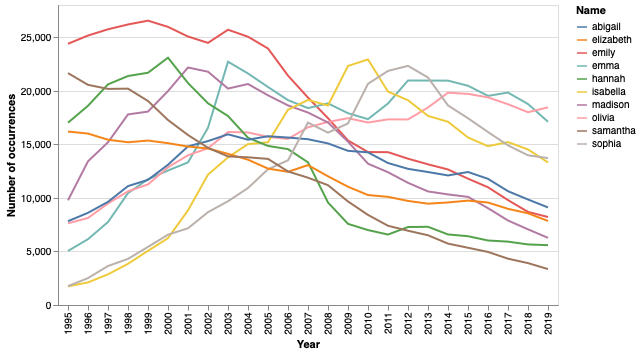

In [5]:
alt.Chart(df_3[df_3.sex=="F"]).mark_line().encode(
    alt.X("year:O", title="Year"),
    alt.Y("number", title="Number of occurrences"),
    alt.Color("name", title="Name"),
    tooltip = ['name', 'year', 'number']
)

### Our selected names

In [25]:
names = ['Macarena', 'Elisa', 'Victoria', 'Gina', 'Aisha', 'Carlina']
names = pd.DataFrame([i.lower() for i in names]).rename(columns={0:"name"})
names

,name
0,macarena
1,elisa
2,victoria
3,gina
4,aisha
5,carlina


In [26]:
# merge original database with most repeated names
df_3 = pd.merge(names, df, how="inner", on=["name", "name"])
df_3

,name,sex,number,year
0,macarena,F,18,1995
1,macarena,F,6,1996
2,macarena,F,5,1997
3,macarena,F,10,2001
4,macarena,F,12,2002
...,...,...,...,...
158,carlina,F,16,2015
159,carlina,F,19,2016
160,carlina,F,11,2017
161,carlina,F,12,2018


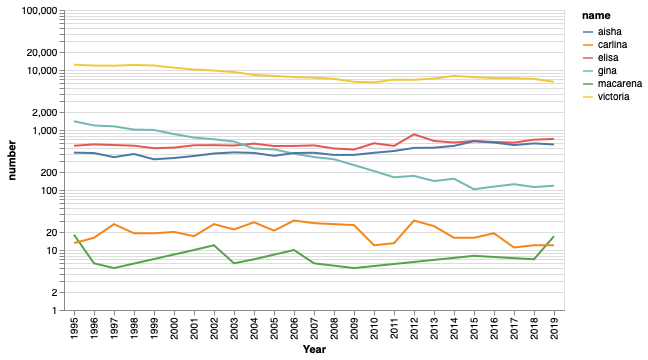

In [27]:
alt.Chart(df_3[df_3.sex=="F"]).mark_line().encode(
    alt.X("year:O", title="Year"),
    alt.Y("number", scale=alt.Scale(type='log')),
    alt.Color("name"),
    tooltip = ['name', 'year', 'number']
)